# Comparison

Now that we have attained the four models trained on the training set, we now compare the performance of these models on the test set. First we import some necessary libraries.

In [1]:
import os
import pandas as pd
import random
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

Each model gives their respective probabilities of a case having heart disease based on given information for the other features. We read each list of probabilities in and store them in an array.

In [2]:
cal_df = pd.read_csv("Calvin2.csv")
erin_df = pd.read_csv("test_prob_preserved.csv")
em_df = pd.read_csv("EmeliasResults.csv")
equal_df = pd.read_csv("test_prob_equal.csv")
nm_df = pd.read_csv("EmeliasNoMissingResults.csv")
test_df = pd.read_csv("imputed_test_90_10.csv")

In [11]:
cal = cal_df['Probabilities']
erin = erin_df['0']
em = em_df['Probability of Heart Disease']
equal = equal_df['0']
nm = nm_df["Probability of Heart Disease"]
test = test_df['HeartDiseaseorAttack']

We now take the probabilities produced by the models and produce ROC curves based on these values and the true values stored in "test".

In [12]:
from sklearn.metrics import roc_curve
cal_fpr, cal_tpr, _ = roc_curve(test, cal)
erin_fpr, erin_tpr, _ = roc_curve(test, erin)
em_fpr, em_tpr, _ = roc_curve(test, em)
eq_fpr, eq_tpr, _ = roc_curve(test, equal)
nm_fpr, nm_tpr, _ = roc_curve(test, nm)

We now plot the ROC curves on the same graph.

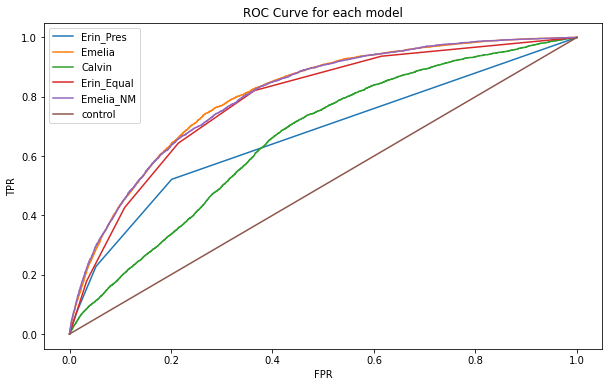

In [15]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(erin_fpr, erin_tpr, label='Erin_Pres')
plt.plot(em_fpr, em_tpr, label='Emelia')
plt.plot(cal_fpr, cal_tpr, label='Calvin')
plt.plot(eq_fpr, eq_tpr, label='Erin_Equal')
plt.plot(nm_fpr, nm_tpr, label='Emelia_NM')

plt.plot(x,y,label='control')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()

We look at the AUC (Area Under the Curve) score for each curve to get a numerical answer to which model performed the best. We can say that the larger the AUC, the better the model predicts a positive case.

In [14]:
from sklearn.metrics import roc_auc_score
print("Cal AUC: " + str(roc_auc_score(test, cal)))
print("Erin AUC: " + str(roc_auc_score(test, erin)))
print("Emelia AUC: " + str(roc_auc_score(test, em)))
print("Erin Equal AUC: " + str(roc_auc_score(test, equal)))
print("Emelia No Missing AUC: " + str(roc_auc_score(test, nm)))

Cal AUC: 0.6604129668170541
Erin AUC: 0.6698199950801929
Emelia AUC: 0.8057904028769552
Erin Equal AUC: 0.7851794239506134
Emelia No Missing AUC: 0.8036307706102066
